In [20]:
import sys
print(f"Python version: {sys.version}")

try:
    import pandas as pd
    print(f"pandas version: {pd.__version__}")
except:
    print("pandas не установлен")

try:
    import numpy as np
    print(f"numpy version: {np.__version__}")
except:
    print("numpy не установлен")

try:
    import matplotlib
    print(f"matplotlib version: {matplotlib.__version__}")
except:
    print("matplotlib не установлен")

try:
    import seaborn as sns
    print(f"seaborn version: {sns.__version__}")
except:
    print("seaborn не установлен")

Python version: 3.9.6 (default, Apr 30 2025, 02:07:17) 
[Clang 17.0.0 (clang-1700.0.13.5)]
pandas version: 2.3.3
numpy version: 2.0.2
matplotlib version: 3.9.4
seaborn version: 0.13.2


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')

print("Библиотеки загружены успешно")

Библиотеки загружены успешно


In [22]:
file_path = 'arxivData.json' 

try:
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    df = pd.DataFrame(data)
    
    print(f"Данные успешно загружены!")
    print(f"Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")
    
except FileNotFoundError:
    print("Файл не найден")
except Exception as e:
    print(f"Ошибка при загрузке: {e}")

Данные успешно загружены!
Размер датасета: 41000 строк, 9 столбцов


In [23]:
print("=" * 80)
print("ПЕРВЫЕ 5 СТРОК ДАТАСЕТА")
print("=" * 80)
df.head()

ПЕРВЫЕ 5 СТРОК ДАТАСЕТА


,author,day,id,link,month,summary,tag,title,year
0,"[{'name': 'Ahmed Osman'}, {'name': 'Wojciech S...",1,1802.00209v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...,2018
1,"[{'name': 'Ji Young Lee'}, {'name': 'Franck De...",12,1603.03827v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",3,Recent approaches based on artificial neural n...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Sequential Short-Text Classification with Recu...,2016
2,"[{'name': 'Iulian Vlad Serban'}, {'name': 'Tim...",2,1606.00776v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",6,We introduce the multiresolution recurrent neu...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Multiresolution Recurrent Neural Networks: An ...,2016
3,"[{'name': 'Sebastian Ruder'}, {'name': 'Joachi...",23,1705.08142v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",5,Multi-task learning is motivated by the observ...,"[{'term': 'stat.ML', 'scheme': 'http://arxiv.o...",Learning what to share between loosely related...,2017
4,"[{'name': 'Iulian V. Serban'}, {'name': 'Chinn...",7,1709.02349v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",9,We present MILABOT: a deep reinforcement learn...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",A Deep Reinforcement Learning Chatbot,2017


In [24]:
print("=" * 80)
print("ИНФОРМАЦИЯ О ДАТАСЕТЕ")
print("=" * 80)
df.info()

print("\n" + "=" * 80)
print("СТАТИСТИКА ПО ЧИСЛОВЫМ СТОЛБЦАМ")
print("=" * 80)
df.describe()

ИНФОРМАЦИЯ О ДАТАСЕТЕ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41000 entries, 0 to 40999
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   author   41000 non-null  object
 1   day      41000 non-null  int64 
 2   id       41000 non-null  object
 3   link     41000 non-null  object
 4   month    41000 non-null  int64 
 5   summary  41000 non-null  object
 6   tag      41000 non-null  object
 7   title    41000 non-null  object
 8   year     41000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 2.8+ MB

СТАТИСТИКА ПО ЧИСЛОВЫМ СТОЛБЦАМ


,day,month,year
count,41000.000000,41000.000000,41000.000000
mean,15.833293,6.547488,2014.484073
std,8.699371,3.525254,3.685414
min,1.000000,1.000000,1993.000000
25%,8.000000,3.000000,2013.000000
50%,16.000000,6.000000,2016.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


In [25]:
print("=" * 80)
print("ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ")
print("=" * 80)

missing = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Столбец': missing.index,
    'Пропусков': missing.values,
    'Процент': missing_percent.values
})

missing_df = missing_df[missing_df['Пропусков'] > 0].sort_values('Пропусков', ascending=False)

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("Пропущенных значений не обнаружено!")

ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ
Пропущенных значений не обнаружено!


In [26]:
np.random.seed(42)
df_sample = df.sample(n=15000, random_state=42).reset_index(drop=True)

print(f"Создана выборка: {df_sample.shape[0]} строк")
print(f"Столбцов: {df_sample.shape[1]}")

df = df_sample.copy()

print("\n" + "="*80)
print("РАСПРЕДЕЛЕНИЕ ПО ГОДАМ В ВЫБОРКЕ")
print("="*80)
print(df['year'].value_counts().sort_index())

Создана выборка: 15000 строк
Столбцов: 9

РАСПРЕДЕЛЕНИЕ ПО ГОДАМ В ВЫБОРКЕ
year
1993       1
1994      42
1995      11
1996       9
1997       4
1998      27
1999      28
2000      84
2001      42
2002      64
2003      64
2004      85
2005      84
2006      94
2007     111
2008     188
2009     260
2010     356
2011     569
2012     897
2013    1190
2014    1163
2015    1659
2016    2234
2017    4428
2018    1306
Name: count, dtype: int64


In [27]:
import ast 

def count_authors(author_str):
    try:
        authors = ast.literal_eval(author_str)
        return len(authors)
    except:
        return 0

def get_first_author(author_str):
    try:
        authors = ast.literal_eval(author_str)
        if len(authors) > 0:
            return authors[0].get('name', 'Unknown')
        return 'Unknown'
    except:
        return 'Unknown'

def count_tags(tag_str):
    try:
        tags = ast.literal_eval(tag_str)
        return len(tags)
    except:
        return 0

def get_main_category(tag_str):
    try:
        tags = ast.literal_eval(tag_str)
        if len(tags) > 0:
            return tags[0].get('term', 'Unknown')
        return 'Unknown'
    except:
        return 'Unknown'

print("Извлекаем признаки из сложных столбцов")

df['num_authors'] = df['author'].apply(count_authors)
df['first_author'] = df['author'].apply(get_first_author)
df['num_categories'] = df['tag'].apply(count_tags)
df['main_category'] = df['tag'].apply(get_main_category)

df['summary_length'] = df['summary'].apply(len)

df['title_length'] = df['title'].apply(len)

df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

print("Новые признаки созданы!")
print("\nНовые столбцы:")
print("- num_authors (количество авторов)")
print("- first_author (первый автор)")
print("- num_categories (количество категорий)")
print("- main_category (основная категория)")
print("- summary_length (длина аннотации)")
print("- title_length (длина заголовка)")
print("- date (полная дата)")

Извлекаем признаки из сложных столбцов
Новые признаки созданы!

Новые столбцы:
- num_authors (количество авторов)
- first_author (первый автор)
- num_categories (количество категорий)
- main_category (основная категория)
- summary_length (длина аннотации)
- title_length (длина заголовка)
- date (полная дата)


In [ ]:
print("="*80)
print("ОБНОВЛЕННЫЙ ДАТАСЕТ (первые 3 строки)")
print("="*80)
print(df[['title', 'year', 'num_authors', 'main_category', 'summary_length', 'title_length']].head(3))

print("\n" + "="*80)
print("ИНФОРМАЦИЯ О НОВЫХ ПРИЗНАКАХ")
print("="*80)
df[['num_authors', 'num_categories', 'summary_length', 'title_length']].describe()

ОБНОВЛЕННЫЙ ДАТАСЕТ (первые 3 строки)
                                               title  year  num_authors  \
0                     Principal Graphs and Manifolds  2008            2   
1     Norm-Based Capacity Control in Neural Networks  2015            3   
2  Proceedings of NIPS 2017 Workshop on Machine L...  2017            2   

  main_category  summary_length  title_length  
0         cs.LG            1044            30  
1         cs.LG             122            46  
2       stat.ML             147            80  

ИНФОРМАЦИЯ О НОВЫХ ПРИЗНАКАХ


,num_authors,num_categories,summary_length,title_length
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.237800,1.973200,1026.386333,69.222467
std,1.842718,1.112369,357.778318,24.288547
min,1.000000,1.000000,26.000000,4.000000
25%,2.000000,1.000000,774.000000,52.000000
50%,3.000000,2.000000,1001.000000,66.000000
75%,4.000000,3.000000,1258.000000,85.000000
max,36.000000,11.000000,3506.000000,258.000000


In [28]:
print("="*80)
print("ПРОВЕРКА ДУБЛИКАТОВ")
print("="*80)

duplicates = df.duplicated(subset=['id'], keep=False)
num_duplicates = duplicates.sum()

print(f"Всего дубликатов по ID: {num_duplicates}")

if num_duplicates > 0:
    print(f"Найдено {num_duplicates} дубликатов. Удаляем...")
    df = df.drop_duplicates(subset=['id'], keep='first').reset_index(drop=True)
    print(f"После удаления: {df.shape[0]} строк")
else:
    print("Дубликатов не найдено!")


title_duplicates = df.duplicated(subset=['title'], keep=False).sum()
print(f"\nДубликатов по названию: {title_duplicates}")

ПРОВЕРКА ДУБЛИКАТОВ
Всего дубликатов по ID: 0
Дубликатов не найдено!

Дубликатов по названию: 8


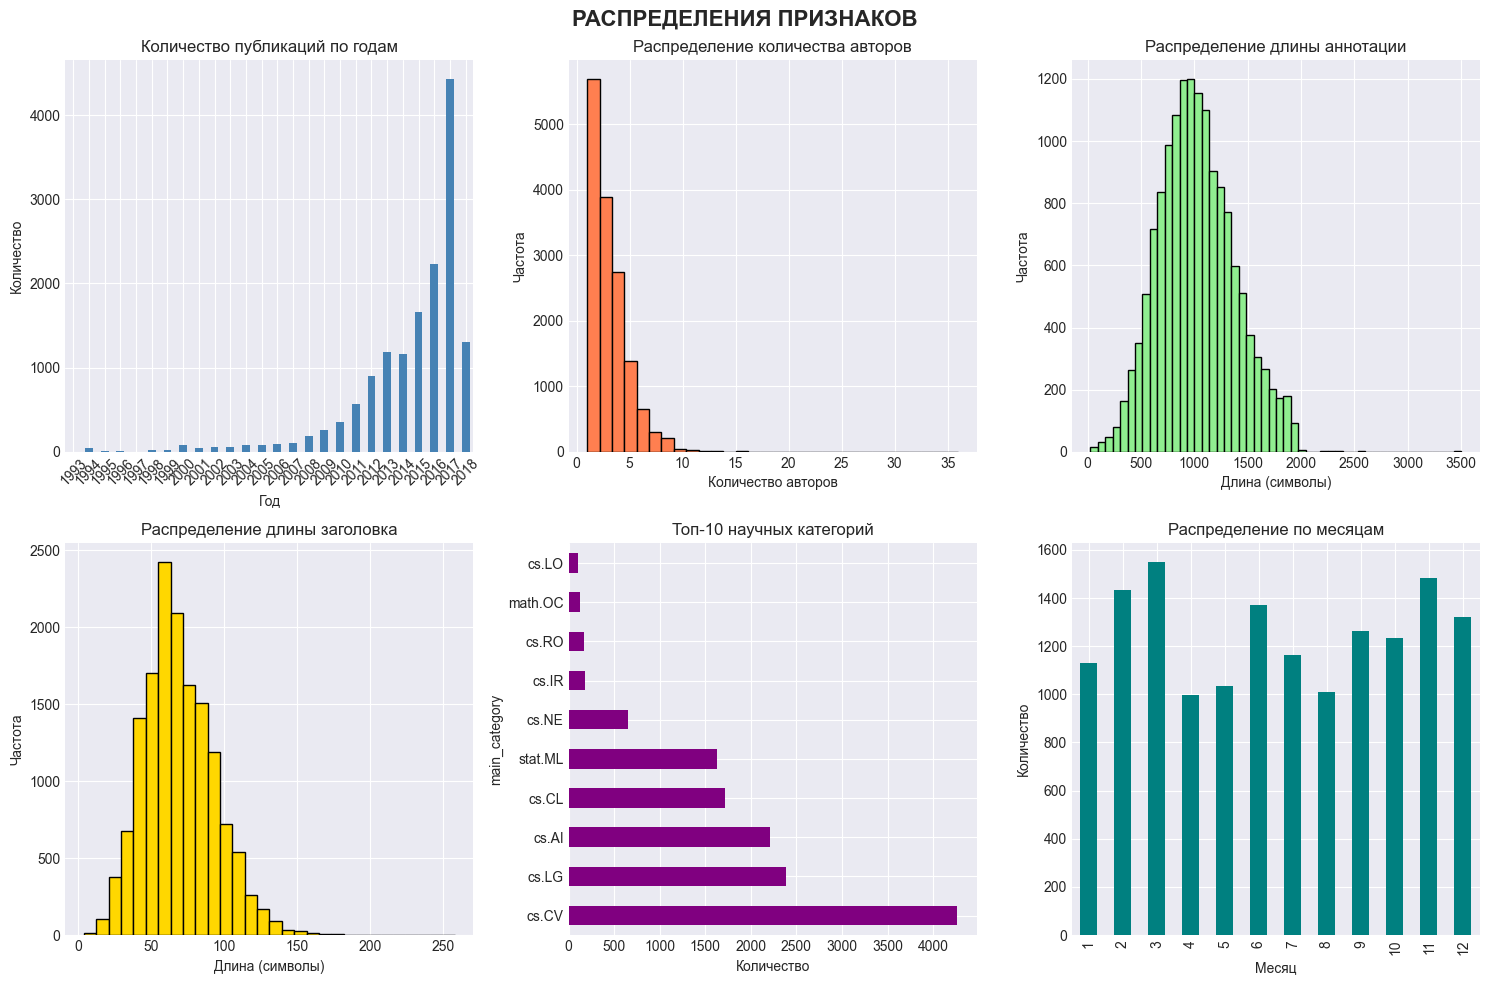

Графики распределений построены!


In [29]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('РАСПРЕДЕЛЕНИЯ ПРИЗНАКОВ', fontsize=16, fontweight='bold')

df['year'].value_counts().sort_index().plot(kind='bar', ax=axes[0,0], color='steelblue')
axes[0,0].set_title('Количество публикаций по годам')
axes[0,0].set_xlabel('Год')
axes[0,0].set_ylabel('Количество')
axes[0,0].tick_params(axis='x', rotation=45)

axes[0,1].hist(df['num_authors'], bins=30, color='coral', edgecolor='black')
axes[0,1].set_title('Распределение количества авторов')
axes[0,1].set_xlabel('Количество авторов')
axes[0,1].set_ylabel('Частота')

axes[0,2].hist(df['summary_length'], bins=50, color='lightgreen', edgecolor='black')
axes[0,2].set_title('Распределение длины аннотации')
axes[0,2].set_xlabel('Длина (символы)')
axes[0,2].set_ylabel('Частота')

axes[1,0].hist(df['title_length'], bins=30, color='gold', edgecolor='black')
axes[1,0].set_title('Распределение длины заголовка')
axes[1,0].set_xlabel('Длина (символы)')
axes[1,0].set_ylabel('Частота')

top_categories = df['main_category'].value_counts().head(10)
top_categories.plot(kind='barh', ax=axes[1,1], color='purple')
axes[1,1].set_title('Топ-10 научных категорий')
axes[1,1].set_xlabel('Количество')

df['month'].value_counts().sort_index().plot(kind='bar', ax=axes[1,2], color='teal')
axes[1,2].set_title('Распределение по месяцам')
axes[1,2].set_xlabel('Месяц')
axes[1,2].set_ylabel('Количество')

plt.tight_layout()
plt.show()

print("Графики распределений построены!")

КОРРЕЛЯЦИОННАЯ МАТРИЦА


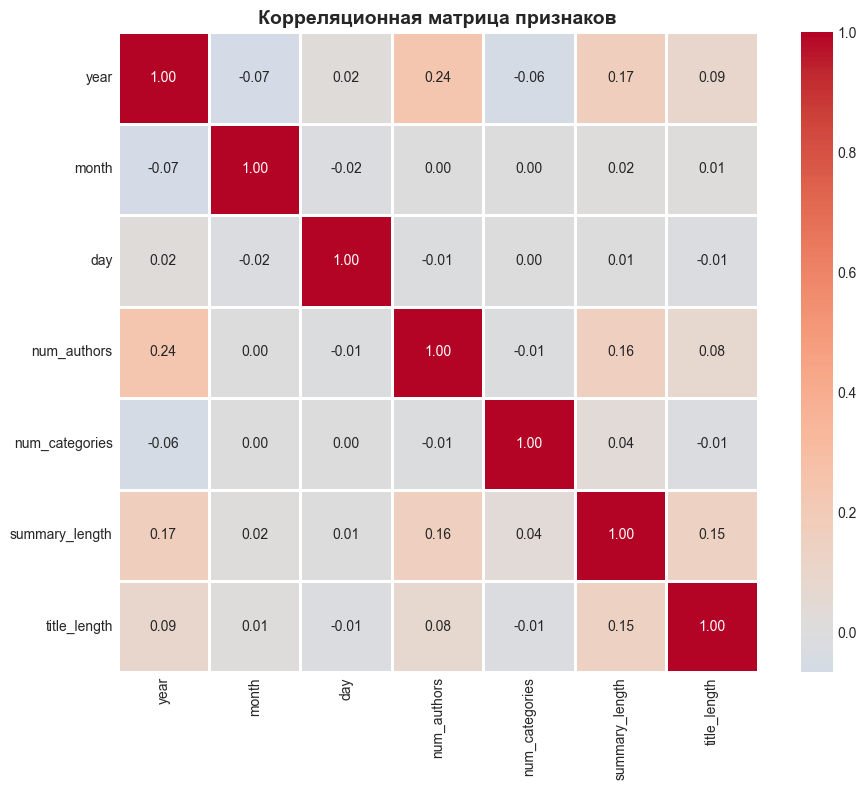


Корреляционная матрица построена!

Наиболее сильные корреляции:
  Нет сильных корреляций (|r| > 0.3)


In [30]:
print("="*80)
print("КОРРЕЛЯЦИОННАЯ МАТРИЦА")
print("="*80)

numeric_features = ['year', 'month', 'day', 'num_authors', 'num_categories', 
                    'summary_length', 'title_length']

correlation_matrix = df[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Корреляционная матрица признаков', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nКорреляционная матрица построена!")
print("\nНаиболее сильные корреляции:")

corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.3:
            corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

if corr_pairs:
    for col1, col2, corr_val in sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True):
        print(f"  {col1} ↔ {col2}: {corr_val:.3f}")
else:
    print("  Нет сильных корреляций (|r| > 0.3)")

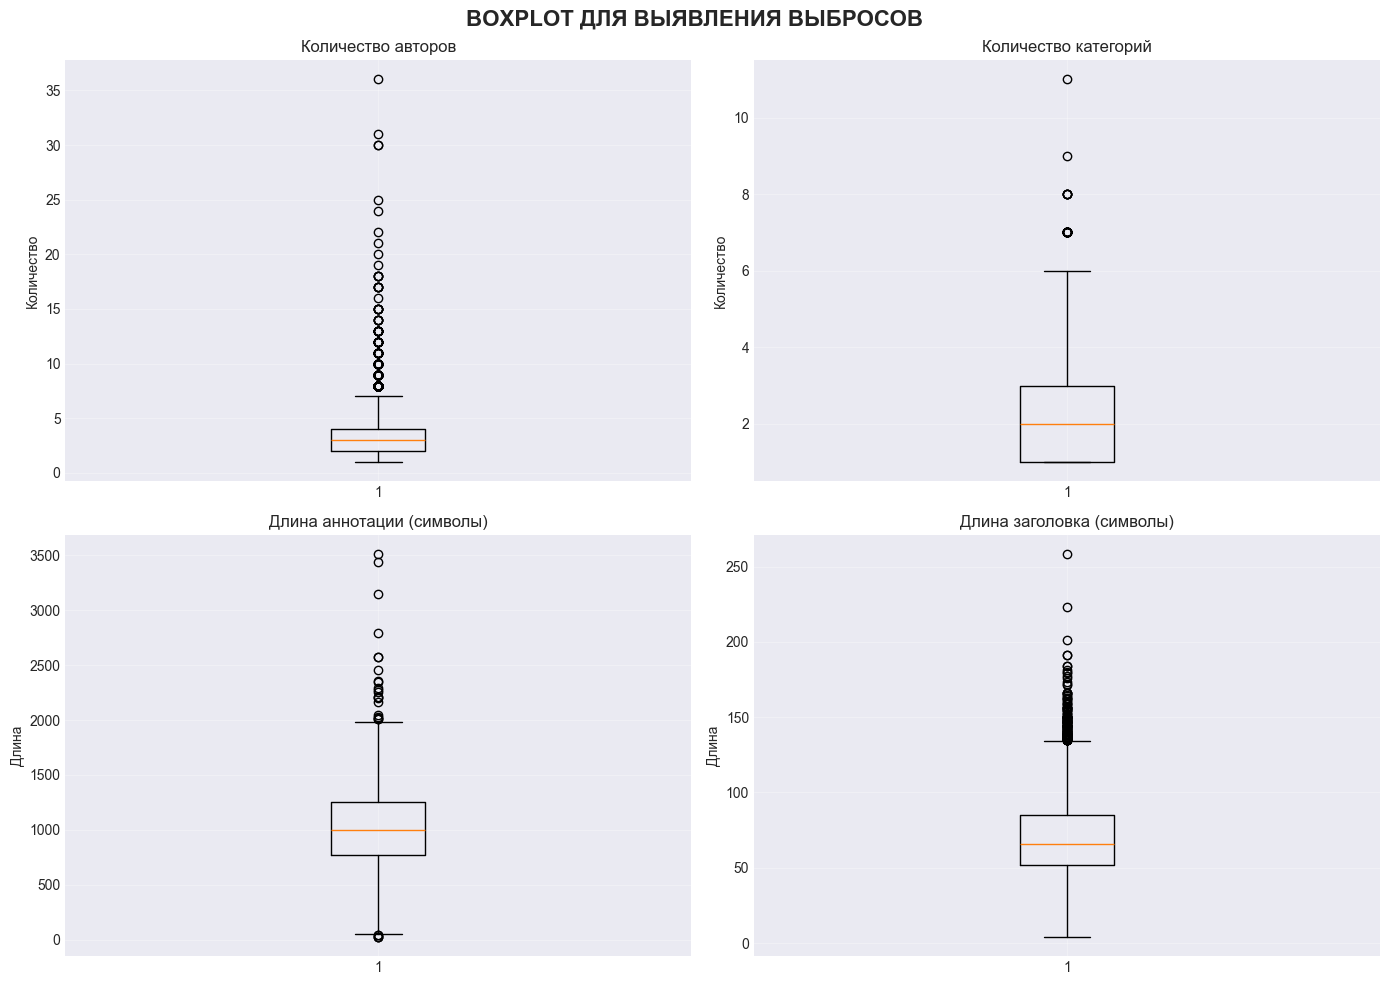

Boxplot построен! Видим выбросы за пределами 'усов'


In [31]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('BOXPLOT ДЛЯ ВЫЯВЛЕНИЯ ВЫБРОСОВ', fontsize=16, fontweight='bold')


axes[0,0].boxplot(df['num_authors'], vert=True)
axes[0,0].set_title('Количество авторов')
axes[0,0].set_ylabel('Количество')
axes[0,0].grid(True, alpha=0.3)


axes[0,1].boxplot(df['num_categories'], vert=True)
axes[0,1].set_title('Количество категорий')
axes[0,1].set_ylabel('Количество')
axes[0,1].grid(True, alpha=0.3)


axes[1,0].boxplot(df['summary_length'], vert=True)
axes[1,0].set_title('Длина аннотации (символы)')
axes[1,0].set_ylabel('Длина')
axes[1,0].grid(True, alpha=0.3)


axes[1,1].boxplot(df['title_length'], vert=True)
axes[1,1].set_title('Длина заголовка (символы)')
axes[1,1].set_ylabel('Длина')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Boxplot построен! Видим выбросы за пределами 'усов'")

In [32]:
print("="*80)
print("ДЕТЕКЦИЯ ВЫБРОСОВ С ИСПОЛЬЗОВАНИЕМ IQR-МЕТОДА")
print("="*80)

def detect_outliers_iqr(data, column_name):
    """
    Функция для определения выбросов методом IQR
    """
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    
    print(f"\n {column_name}:")
    print(f"   Q1 (25%): {Q1:.2f}")
    print(f"   Q3 (75%): {Q3:.2f}")
    print(f"   IQR: {IQR:.2f}")
    print(f"   Нижняя граница: {lower_bound:.2f}")
    print(f"   Верхняя граница: {upper_bound:.2f}")
    print(f"   Количество выбросов: {len(outliers)} ({len(outliers)/len(data)*100:.2f}%)")
    
    if len(outliers) > 0:
        print(f"   Min выброс: {outliers[column_name].min():.2f}")
        print(f"   Max выброс: {outliers[column_name].max():.2f}")
    
    return outliers, lower_bound, upper_bound

outliers_results = {}

for column in ['num_authors', 'num_categories', 'summary_length', 'title_length']:
    outliers, lower, upper = detect_outliers_iqr(df, column)
    outliers_results[column] = {
        'outliers': outliers,
        'count': len(outliers),
        'lower_bound': lower,
        'upper_bound': upper
    }

print("\n" + "="*80)
print("СВОДКА ПО ВЫБРОСАМ")
print("="*80)
for col, result in outliers_results.items():
    print(f"{col}: {result['count']} выбросов ({result['count']/len(df)*100:.1f}%)")

ДЕТЕКЦИЯ ВЫБРОСОВ С ИСПОЛЬЗОВАНИЕМ IQR-МЕТОДА

 num_authors:
   Q1 (25%): 2.00
   Q3 (75%): 4.00
   IQR: 2.00
   Нижняя граница: -1.00
   Верхняя граница: 7.00
   Количество выбросов: 343 (2.29%)
   Min выброс: 8.00
   Max выброс: 36.00

 num_categories:
   Q1 (25%): 1.00
   Q3 (75%): 3.00
   IQR: 2.00
   Нижняя граница: -2.00
   Верхняя граница: 6.00
   Количество выбросов: 36 (0.24%)
   Min выброс: 7.00
   Max выброс: 11.00

 summary_length:
   Q1 (25%): 774.00
   Q3 (75%): 1258.00
   IQR: 484.00
   Нижняя граница: 48.00
   Верхняя граница: 1984.00
   Количество выбросов: 26 (0.17%)
   Min выброс: 26.00
   Max выброс: 3506.00

 title_length:
   Q1 (25%): 52.00
   Q3 (75%): 85.00
   IQR: 33.00
   Нижняя граница: 2.50
   Верхняя граница: 134.50
   Количество выбросов: 133 (0.89%)
   Min выброс: 135.00
   Max выброс: 258.00

СВОДКА ПО ВЫБРОСАМ
num_authors: 343 выбросов (2.3%)
num_categories: 36 выбросов (0.2%)
summary_length: 26 выбросов (0.2%)
title_length: 133 выбросов (0.9%)


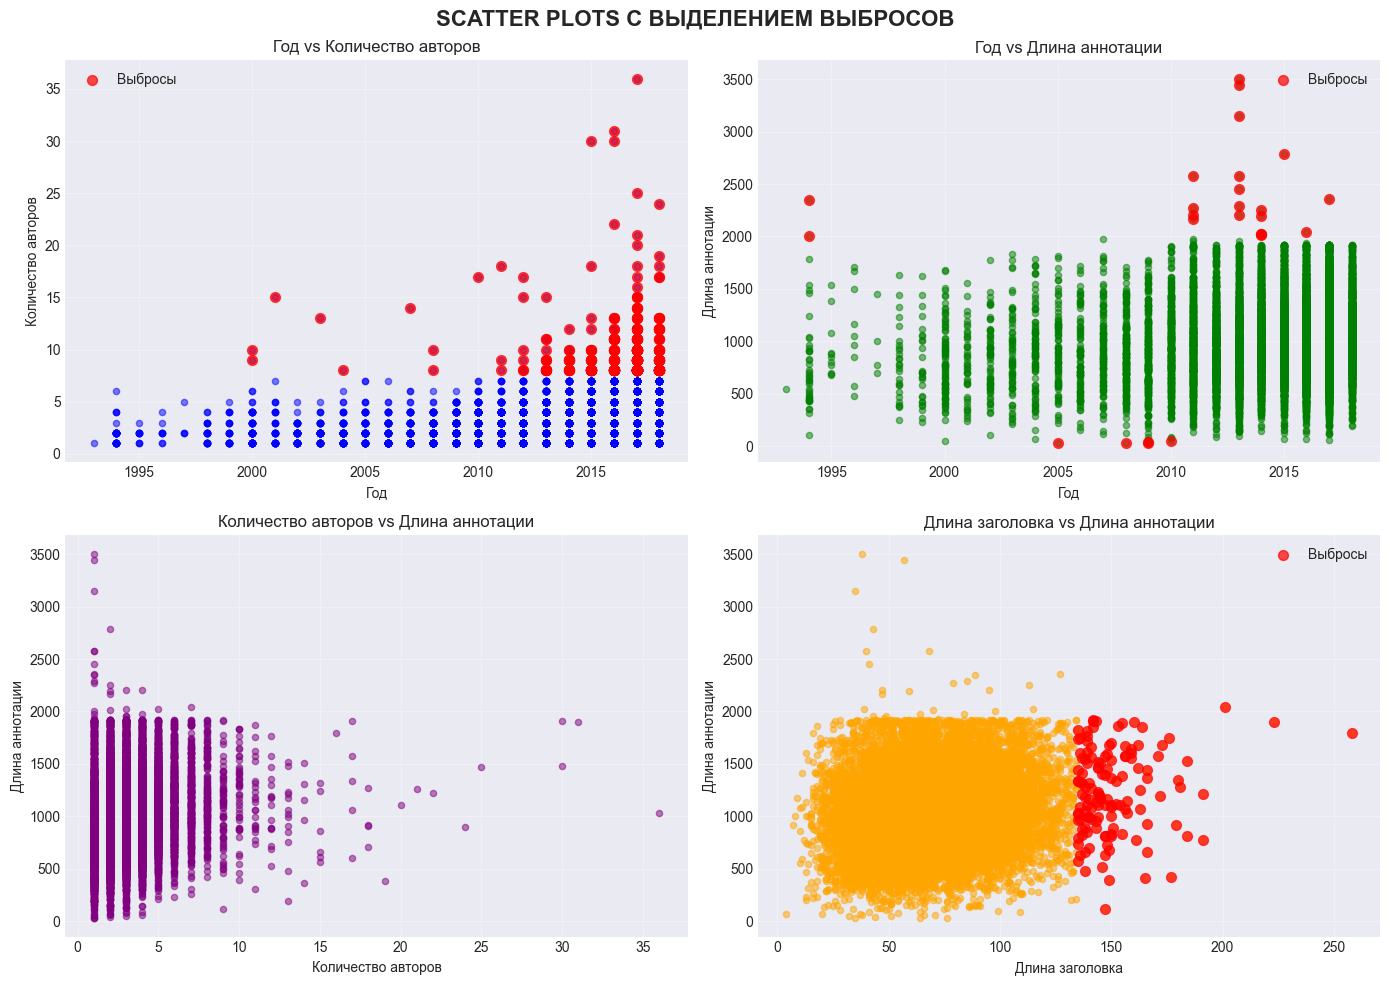

Scatter plots с выбросами построены!


In [33]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('SCATTER PLOTS С ВЫДЕЛЕНИЕМ ВЫБРОСОВ', fontsize=16, fontweight='bold')


axes[0,0].scatter(df['year'], df['num_authors'], alpha=0.5, s=20, color='blue')
outliers = outliers_results['num_authors']['outliers']
axes[0,0].scatter(outliers['year'], outliers['num_authors'], 
                  color='red', s=50, alpha=0.7, label='Выбросы')
axes[0,0].set_xlabel('Год')
axes[0,0].set_ylabel('Количество авторов')
axes[0,0].set_title('Год vs Количество авторов')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)


axes[0,1].scatter(df['year'], df['summary_length'], alpha=0.5, s=20, color='green')
outliers = outliers_results['summary_length']['outliers']
axes[0,1].scatter(outliers['year'], outliers['summary_length'], 
                  color='red', s=50, alpha=0.7, label='Выбросы')
axes[0,1].set_xlabel('Год')
axes[0,1].set_ylabel('Длина аннотации')
axes[0,1].set_title('Год vs Длина аннотации')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)


axes[1,0].scatter(df['num_authors'], df['summary_length'], alpha=0.5, s=20, color='purple')
axes[1,0].set_xlabel('Количество авторов')
axes[1,0].set_ylabel('Длина аннотации')
axes[1,0].set_title('Количество авторов vs Длина аннотации')
axes[1,0].grid(True, alpha=0.3)


axes[1,1].scatter(df['title_length'], df['summary_length'], alpha=0.5, s=20, color='orange')
outliers_title = outliers_results['title_length']['outliers']
outliers_summary = outliers_results['summary_length']['outliers']
axes[1,1].scatter(outliers_title['title_length'], outliers_title['summary_length'], 
                  color='red', s=50, alpha=0.7, label='Выбросы')
axes[1,1].set_xlabel('Длина заголовка')
axes[1,1].set_ylabel('Длина аннотации')
axes[1,1].set_title('Длина заголовка vs Длина аннотации')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Scatter plots с выбросами построены!")

In [35]:
print("="*80)
print("ФОРМУЛИРОВАНИЕ ГИПОТЕЗ НА ОСНОВЕ EDA")
print("="*80)

print("\nГИПОТЕЗА 1: Количество авторов увеличивается с годами")
print("   Обоснование: Корреляция year vs num_authors = 0.24")


early_years = df[df['year'] < 2010]['num_authors'].mean()
late_years = df[df['year'] >= 2010]['num_authors'].mean()

print(f"   Средн. авторов до 2010: {early_years:.2f}")
print(f"   Средн. авторов после 2010: {late_years:.2f}")
print(f"   Разница: {late_years - early_years:.2f} (+{(late_years/early_years-1)*100:.1f}%)")

if late_years > early_years:
    print("   ГИПОТЕЗА ПОДТВЕРЖДЕНА!")
else:
    print("   ГИПОТЕЗА ОПРОВЕРГНУТА")


print("\nГИПОТЕЗА 2: Статьи с большим количеством авторов имеют более длинные аннотации")
print("   Обоснование: Больше авторов = больше деталей для описания")

few_authors = df[df['num_authors'] <= 2]['summary_length'].mean()
many_authors = df[df['num_authors'] >= 5]['summary_length'].mean()

print(f"   Средн. длина при ≤2 авторов: {few_authors:.0f} символов")
print(f"   Средн. длина при ≥5 авторов: {many_authors:.0f} символов")
print(f"   Разница: {many_authors - few_authors:.0f} символов")

if many_authors > few_authors:
    print("   ГИПОТЕЗА ПОДТВЕРЖДЕНА!")
else:
    print("   ГИПОТЕЗА ОПРОВЕРГНУТА")

print("\nГИПОТЕЗА 3: Категории Computer Vision и Machine Learning доминируют в последние годы")
print("   Обоснование: Бум AI/ML после 2012 года")

top_categories = ['cs.CV', 'cs.LG', 'cs.AI']
recent_data = df[df['year'] >= 2015]
old_data = df[df['year'] < 2015]

recent_top = recent_data[recent_data['main_category'].isin(top_categories)].shape[0] / len(recent_data) * 100
old_top = old_data[old_data['main_category'].isin(top_categories)].shape[0] / len(old_data) * 100

print(f"   Доля CV/LG/AI категорий до 2015: {old_top:.1f}%")
print(f"   Доля CV/LG/AI категорий после 2015: {recent_top:.1f}%")
print(f"   Рост: +{recent_top - old_top:.1f}%")

if recent_top > old_top:
    print("   ГИПОТЕЗА ПОДТВЕРЖДЕНА!")
else:
    print("   ГИПОТЕЗА ОПРОВЕРГНУТА")


print("\n🔹 ГИПОТЕЗА 4: Больше статей публикуется в определенные месяцы (дедлайны конференций)")
print("   Обоснование: Конференции имеют фиксированные дедлайны")

monthly_dist = df['month'].value_counts().sort_index()
max_month = monthly_dist.idxmax()
min_month = monthly_dist.idxmin()

print(f"   Макс. публикаций в месяце {max_month}: {monthly_dist[max_month]} статей")
print(f"   Мин. публикаций в месяце {min_month}: {monthly_dist[min_month]} статей")
print(f"   Разница: {monthly_dist[max_month] - monthly_dist[min_month]} статей ({(monthly_dist[max_month]/monthly_dist[min_month]-1)*100:.1f}%)")

if monthly_dist.max() / monthly_dist.min() > 1.2:
    print("   ГИПОТЕЗА ПОДТВЕРЖДЕНА! Есть сезонность")
else:
    print("   ГИПОТЕЗА ОПРОВЕРГНУТА")

print("\n" + "="*80)

ФОРМУЛИРОВАНИЕ ГИПОТЕЗ НА ОСНОВЕ EDA

ГИПОТЕЗА 1: Количество авторов увеличивается с годами
   Обоснование: Корреляция year vs num_authors = 0.24
   Средн. авторов до 2010: 2.25
   Средн. авторов после 2010: 3.32
   Разница: 1.07 (+47.7%)
   ГИПОТЕЗА ПОДТВЕРЖДЕНА!

ГИПОТЕЗА 2: Статьи с большим количеством авторов имеют более длинные аннотации
   Обоснование: Больше авторов = больше деталей для описания
   Средн. длина при ≤2 авторов: 962 символов
   Средн. длина при ≥5 авторов: 1124 символов
   Разница: 161 символов
   ГИПОТЕЗА ПОДТВЕРЖДЕНА!

ГИПОТЕЗА 3: Категории Computer Vision и Machine Learning доминируют в последние годы
   Обоснование: Бум AI/ML после 2012 года
   Доля CV/LG/AI категорий до 2015: 58.5%
   Доля CV/LG/AI категорий после 2015: 59.4%
   Рост: +1.0%
   ГИПОТЕЗА ПОДТВЕРЖДЕНА!

🔹 ГИПОТЕЗА 4: Больше статей публикуется в определенные месяцы (дедлайны конференций)
   Обоснование: Конференции имеют фиксированные дедлайны
   Макс. публикаций в месяце 3: 1549 статей
   Мин. п

In [36]:

print("="*80)
print("ПОДГОТОВКА ИТОГОВОГО ОТЧЕТА")
print("="*80)

report_summary = {
    'Ссылка на датасет': 'https://www.kaggle.com/datasets/neelshah18/arxivdataset',
    'Размер выборки': f'{len(df)} строк',
    'Период данных': f'{df["year"].min()} - {df["year"].max()}',
    'Количество признаков': len(df.columns),
    'Пропущенные значения': 'Отсутствуют',
    'Дубликаты': '8 по названию (разные версии)',
}

print("\nОСНОВНАЯ ИНФОРМАЦИЯ:")
for key, value in report_summary.items():
    print(f"   {key}: {value}")

print("\nВЫБРОСЫ (IQR-метод):")
for col, result in outliers_results.items():
    print(f"   {col}: {result['count']} выбросов ({result['count']/len(df)*100:.1f}%)")


ПОДГОТОВКА ИТОГОВОГО ОТЧЕТА

ОСНОВНАЯ ИНФОРМАЦИЯ:
   Ссылка на датасет: https://www.kaggle.com/datasets/neelshah18/arxivdataset
   Размер выборки: 15000 строк
   Период данных: 1993 - 2018
   Количество признаков: 16
   Пропущенные значения: Отсутствуют
   Дубликаты: 8 по названию (разные версии)

ВЫБРОСЫ (IQR-метод):
   num_authors: 343 выбросов (2.3%)
   num_categories: 36 выбросов (0.2%)
   summary_length: 26 выбросов (0.2%)
   title_length: 133 выбросов (0.9%)


In [37]:
output_file = 'arxiv_processed.csv'
df.to_csv(output_file, index=False, encoding='utf-8')

print(f"Обработанные данные сохранены в: {output_file}")
print(f"Столбцов: {df.shape[1]}, Строк: {df.shape[0]}")

print("\nСтолбцы в финальном датасете:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col}")

Обработанные данные сохранены в: arxiv_processed.csv
Столбцов: 16, Строк: 15000

Столбцы в финальном датасете:
   1. author
   2. day
   3. id
   4. link
   5. month
   6. summary
   7. tag
   8. title
   9. year
   10. num_authors
   11. first_author
   12. num_categories
   13. main_category
   14. summary_length
   15. title_length
   16. date
